<a href="https://colab.research.google.com/github/lephuocdat2000/Advanced-CV/blob/main/Dog-and-Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install alexnet_pytorch

In [ ]:
from PIL import Image
import numpy as np
import zipfile
from io import StringIO
import imghdr
import cv2 
from sklearn.model_selection import train_test_split
#from torchvision import models
import torch
from torchvision import transforms
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from alexnet_pytorch import AlexNet

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.RandomHorizontalFlip(),
                               transforms.CenterCrop(250),
                               transforms.Resize(227)])

In [ ]:
# alexnet1= models.alexnet(pretrained=True)
# alexnet1.classifier=alexnet1.classifier[0:3]
# alexnet2=models.alexnet(pretrained=True)
# alexnet2.classifier=alexnet2.classifier[0:6]

In [ ]:
alexnet1= AlexNet.from_pretrained('alexnet')
alexnet1.classifier=alexnet1.classifier[0:3]
alexnet2=AlexNet.from_pretrained('alexnet')
alexnet2.classifier=alexnet2.classifier[0:6]

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth



Loaded pretrained weights for alexnet
Loaded pretrained weights for alexnet


#Đọc file data 

In [ ]:
def Read_data(deep_model):
  path_to_zip_file = '/content/drive/MyDrive/Thị giác máy tính/Thị giác máy tính nâng cao/Dog and Cat.zip'
  imgzip = zipfile.ZipFile(path_to_zip_file)
  inflist = imgzip.infolist()
  images=[]
  labels=[]
  for f in inflist:
      if '.jpg' in f.filename:
        ifile = imgzip.open(f)
        img = Image.open(ifile)
        #Cho vào mạng alexnet
        img_t=transform(img)
        batch_t = torch.unsqueeze(img_t,0)
        out = deep_model(batch_t)
        out=out.detach().numpy()
        images.append(out)
        if 'dog' in f.filename: labels.append(1)
        elif 'cat' in f.filename: labels.append(0)
  images=np.array(images)
  labels=np.array(labels)
  return images,labels

In [ ]:
images1,labels1 = Read_data(alexnet1)
images2,labels2 = Read_data(alexnet2)

# Train model

In [ ]:
def Split_data(images,labels):
  X_train, X_test, y_train, y_test = train_test_split(images,labels, test_size=0.2, random_state=42)
  X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
  X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
  return X_train,X_test,y_train,y_test
def Train_Function(X,y):
   #model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
   model = SVC(gamma='auto')
   model.fit(X,y)
   return model
def Accuracy(model,X,y_true):
   y_pred=model.predict(X)
   return y_pred,accuracy_score(y_pred,y_true)

In [ ]:
X_train_fc1,X_test_fc1,y_train_fc1,y_test_fc1 = Split_data(images1,labels1)
X_train_fc2,X_test_fc2,y_train_fc2,y_test_fc2 = Split_data(images2,labels2)
model1=Train_Function(X_train_fc1,y_train_fc1)
model2=Train_Function(X_train_fc2,y_train_fc2)
y_pred_train_fc1,Accuracy_Train_FC1 = Accuracy(model1,X_train_fc1,y_train_fc1)
y_pred_test_fc1,Accuracy_Test_FC1 = Accuracy(model1,X_test_fc1,y_test_fc1)
y_pred_train_fc2,Accuracy_Train_FC2 = Accuracy(model2,X_train_fc2,y_train_fc2)
y_pred_test_fc2,Accuracy_Test_FC2 = Accuracy(model2,X_test_fc2,y_test_fc2)
print('Accuracy_FC1:',Accuracy_Test_FC1)
print('Accuracy_FC2:',Accuracy_Test_FC2)

Accuracy_FC1: 0.8780487804878049
Accuracy_FC2: 0.8536585365853658


In [ ]:
from sklearn.metrics import f1_score,precision_score,recall_score
print('precision_fc1:',precision_score(y_pred_test_fc1,y_test_fc1,average='binary'))
print('precision_fc2:',precision_score(y_pred_test_fc2,y_test_fc2,average='binary'))
print('recall_fc1:',recall_score(y_pred_test_fc1,y_test_fc1,average='binary'))
print('recall_fc2:',recall_score(y_pred_test_fc2,y_test_fc2,average='binary'))
print('f1_score_fc1:',f1_score(y_pred_test_fc1,y_test_fc1,average='binary'))
print('f1_score_fc2:',f1_score(y_pred_test_fc2,y_test_fc2,average='binary'))

precision_fc1: 0.8947368421052632
precision_fc2: 0.8947368421052632
recall_fc1: 0.85
recall_fc2: 0.8095238095238095
f1_score_fc1: 0.8717948717948718
f1_score_fc2: 0.8500000000000001


<Figure size 432x288 with 0 Axes>

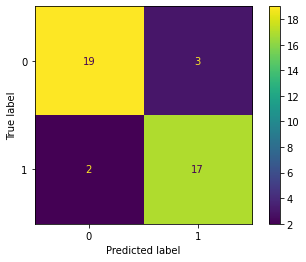

<Figure size 432x288 with 0 Axes>

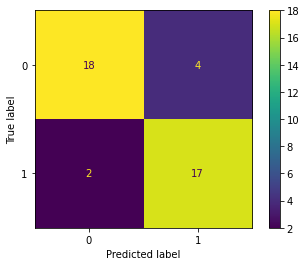

In [ ]:
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plt.figure()
plot_confusion_matrix(model1, X_test_fc1, y_test_fc1)
plt.figure()
plot_confusion_matrix(model2, X_test_fc2, y_test_fc2)
plt.show()

In [17]:
def predict(path_img,deep_model,model):
  img=cv2.imread(path_img)
  img_t=transform(img)
  batch_t = torch.unsqueeze(img_t,0)
  out = deep_model(batch_t)
  out=out.detach().numpy()
  pred = model.predict(out)
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  return pred[0]

0


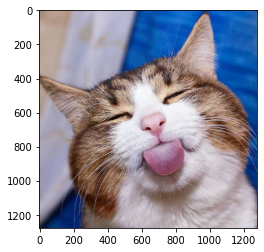

In [18]:
print(predict('/content/chum_anh_chung_to_meo_bi_ngao_da_la_co_that_158278544_1632019.png',alexnet1,model1))

0


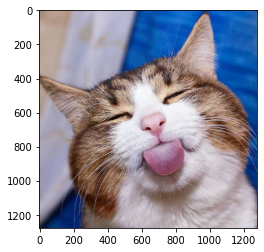

In [19]:
print(predict('/content/chum_anh_chung_to_meo_bi_ngao_da_la_co_that_158278544_1632019.png',alexnet2,model2))

1


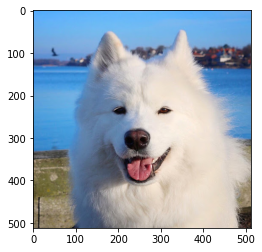

In [20]:
print(predict('/content/unnamed.jpg',alexnet1,model1))

0


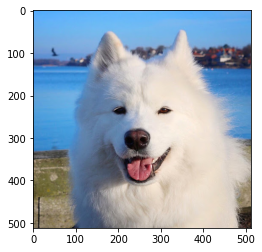

In [21]:
print(predict('/content/unnamed.jpg',alexnet2,model2))

0


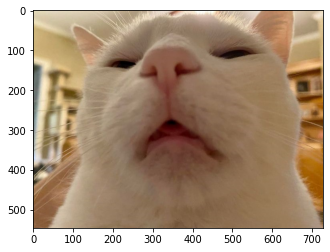

In [22]:
print(predict('/content/Bat-Cuoi-Truoc-Nhung-07.jpg',alexnet1,model1))

0


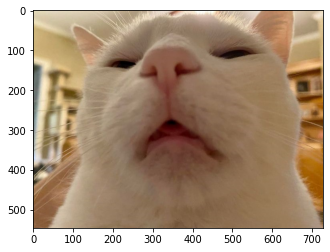

In [23]:
print(predict('/content/Bat-Cuoi-Truoc-Nhung-07.jpg',alexnet2,model2))